In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random as rnd

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import (
    Input, Dense, Activation, Dropout,
    Flatten, BatchNormalization,
    Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
)
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

<h1>About Data</h1>  
      <h2>Context</h2>
          
    (This dataset has the following citation: M. Soliman, M. Kamal, M. Nashed, Y. Mostafa, B. Chawky, D. Khattab, “ Violence Recognition from Videos using Deep Learning Techniques”, Proc. 9th International Conference on Intelligent Computing and Information Systems (ICICIS'19), Cairo, pp. 79-84, 2019. please use it in case of using the dataset in research or engineering purpose )
    when we start our Graduation Project Violence Recognition from Videos we found that there is shortage in available datasets related to violence between individuals so we decide to create new big dataset with variety of scenes

    This data set contains 1000 Violence and 1000 non-violence videos collected from youtube videos, violence videos in our dataset contain many real street fights situations in several environments and conditions.

<h2>content</h2>

    This dataset contains images that have been extracted from the video frames of the above mentioned data. The data set contains 11,063 images which are divided into two classes, Violence and Non-Violence.
    
    -> The violence class has 5832 images.
    -> The non-violence class has 5231 images.

<h1>Data preprocessing Steps</h1>

    1.Frame Extraction
    2.Image Resizing
    3.Data Augmentation
    4.Normalization
    5.Data loading
    6.Data spliting
    

<h3>Dataset loding</h3>

In [2]:
main_path="C:\\Users\\SSN\\Downloads\\violence_dataset"
path_violence=main_path+'\\violence'
path_non_violence=main_path+'\\non_violence'

In [3]:
main_df=pd.DataFrame()

In [4]:
main_df['images']=os.listdir(path_violence)+os.listdir(path_non_violence)

In [5]:
classes = []
paths = []
for image in main_df['images']:
    class_ = image.split('_')[0]
    classes.append(class_)
    if class_ == 'V':
        paths.append(main_path+'\\violence\\'+image)
    else:
        paths.append(main_path+'\\non_violence\\'+image)

In [6]:
main_df['classes'] = classes
main_df['path'] = paths

In [7]:
main_df.head()

,images,classes,path
0,V_1.mp4_frame0.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...
1,V_1.mp4_frame1.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...
2,V_1.mp4_frame2.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...
3,V_1.mp4_frame3.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...
4,V_1.mp4_frame4.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...


In [8]:
main_df.isna().sum()

images     0
classes    0
path       0
dtype: int64

In [9]:
print('Leaves Count: ',len(main_df['classes'].value_counts()))
main_df['classes'].value_counts()

Leaves Count:  2


classes
V     5832
NV    5231
Name: count, dtype: int64

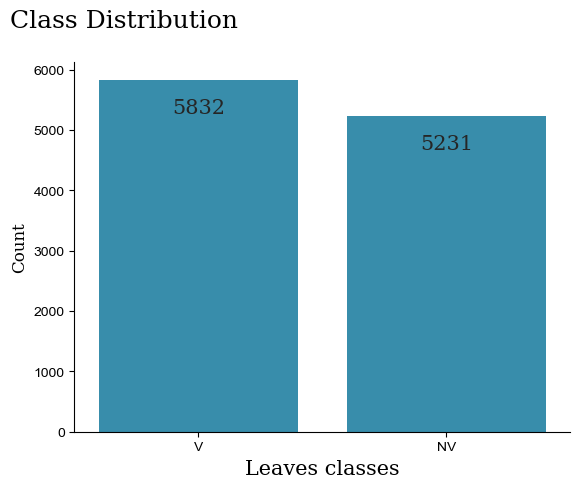

In [10]:
plot = sns.countplot(x = main_df['classes'], color = '#2596be')
sns.set(rc={'figure.figsize':(15,12)})
sns.despine()
plot.set_title('Class Distribution\n', font = 'serif', x = 0.1, y=1, fontsize = 18);
plot.set_ylabel("Count", x = 0.02, font = 'serif', fontsize = 12)
plot.set_xlabel("Leaves classes", fontsize = 15, font = 'serif')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, -20),font = 'serif', textcoords = 'offset points', size = 15)

<h2>Visualizing</h2>

    Image data class visualizing

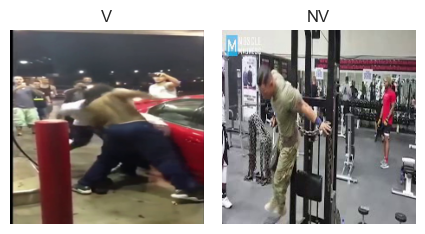

In [11]:
plt.figure(figsize = (15,12))
for idx,i in enumerate(main_df.classes.unique()):
    plt.subplot(4,7,idx+1)
    df = main_df[main_df['classes'] ==i].reset_index(drop = True)
    image_path = df.loc[rnd.randint(0, len(df))-1,'path']
    img = Image.open(image_path)
    img = img.resize((224,224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
plt.tight_layout()
plt.show()

In [12]:
def plot_species(df,image_class):
    plt.figure(figsize = (12,12))
    species_df = df[df['classes'] == image_class].reset_index(drop = True)
    plt.suptitle(image_class)
    for idx,i in enumerate(np.random.choice(species_df['path'],32)):
        plt.subplot(8,8,idx+1)
        image_path = i
        img = Image.open(image_path)
        img = img.resize((224,224))
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


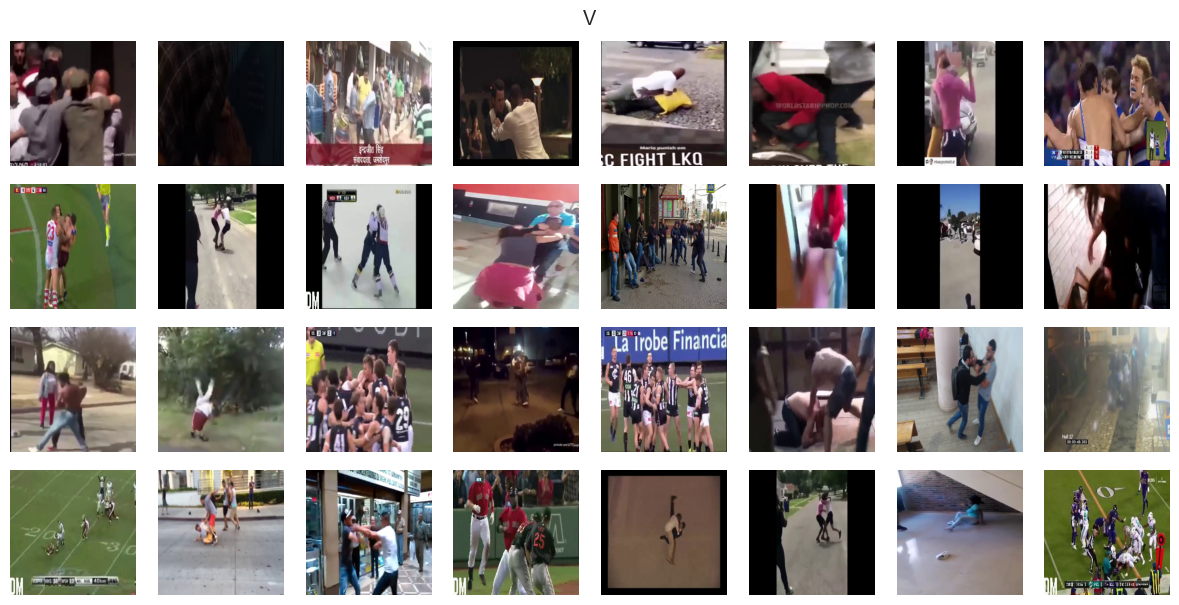

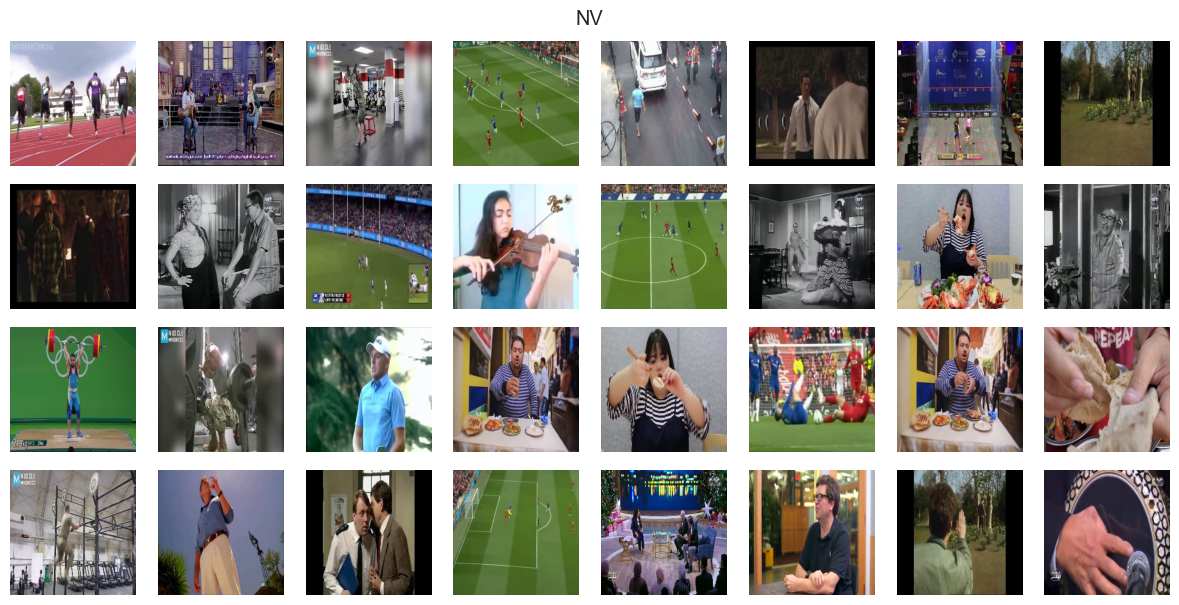

In [13]:
for image_class in main_df['classes'].unique():
    plot_species(main_df , image_class)

In [14]:
widths, heights = [], []

for path in tqdm(main_df["path"]):
    width, height = Image.open(path).size
    widths.append(width)
    heights.append(height)
    
main_df["width"] = widths
main_df["height"] = heights
main_df["dimension"] = main_df["width"] * main_df["height"]

100%|███████████████████████████████████████████████████████████████████████████| 11063/11063 [00:15<00:00, 692.32it/s]


In [15]:
main_df.sort_values('width').head(84)

,images,classes,path,width,height,dimension
5298,V_907.mp4_frame5.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,136,240,32640
5171,V_887.mp4_frame1.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,136,240,32640
5303,V_908.mp4_frame4.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,136,240,32640
5302,V_908.mp4_frame3.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,136,240,32640
5301,V_908.mp4_frame2.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,136,240,32640
...,...,...,...,...,...,...
5558,V_952.mp4_frame1.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,198,360,71280
5557,V_952.mp4_frame0.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,198,360,71280
5422,V_929.mp4_frame3.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,198,360,71280
5443,V_931.mp4_frame5.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,198,360,71280


In [16]:
main_df.sort_values('width').tail(84)

,images,classes,path,width,height,dimension
7310,NV_362.mp4_frame2.jpg,NV,C:\Users\SSN\Downloads\violence_dataset\non_vi...,1920,1080,2073600
7309,NV_362.mp4_frame1.jpg,NV,C:\Users\SSN\Downloads\violence_dataset\non_vi...,1920,1080,2073600
7308,NV_362.mp4_frame0.jpg,NV,C:\Users\SSN\Downloads\violence_dataset\non_vi...,1920,1080,2073600
7278,NV_357.mp4_frame2.jpg,NV,C:\Users\SSN\Downloads\violence_dataset\non_vi...,1920,1080,2073600
7277,NV_357.mp4_frame1.jpg,NV,C:\Users\SSN\Downloads\violence_dataset\non_vi...,1920,1080,2073600
...,...,...,...,...,...,...
3396,V_642.mp4_frame0.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,1920,1080,2073600
3395,V_641.mp4_frame4.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,1920,1080,2073600
3394,V_641.mp4_frame3.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,1920,1080,2073600
3392,V_641.mp4_frame1.jpg,V,C:\Users\SSN\Downloads\violence_dataset\violen...,1920,1080,2073600


In [17]:
main_df.mean(numeric_only=True)

width           567.161349
height          425.959505
dimension    328640.705053
dtype: float64

<h1>Data Spliting</h1>
       
       The dataset was split into training and validation sets:  
                   
             train_generator_mobilenet_v3 for model training.

             val_generator_mobilenet_v3 for validation and performance monitoring.

Both sets used the same preprocessing and augmentation pipeline for consistency (except that augmentation effects apply only during training).

In [18]:
X_train, X_val, y_train, y_val = train_test_split(main_df[['path', 'classes']], main_df[['classes']], test_size=0.2, random_state=42)

<h2>Data augmentation</h2>
      
    To improve generalization and avoid overfitting, a wide range of data augmentation techniques was applied using Keras’ ImageDataGenerator.

<h2>Normalization</h2>

    The preprocessing_function=preprocess_input parameter was used, which is specific to MobileNetV3.

    This function performs channel-wise scaling and normalization to match the input distribution the pretrained MobileNetV3 model expects (i.e., converting RGB values to the standardized range used during pretraining).

In [19]:
mobilenet_v3_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
) 

train_generator_mobilenet_v3 = mobilenet_v3_datagen.flow_from_dataframe(
        X_train,  # This is the source directory for training images
        x_col='path',
        y_col='classes',
        target_size=(448, 448),  # All images will be resized to 448x448
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)
val_generator_mobilenet_v3 = mobilenet_v3_datagen.flow_from_dataframe(
        X_val,  # This is the source directory for training images
        x_col='path',
        y_col='classes',
        target_size=(448, 448),  # All images will be resized to 448x448
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)

Found 8850 validated image filenames belonging to 2 classes.
Found 2213 validated image filenames belonging to 2 classes.


<h2>Modeling</h2>

In [20]:
mobilenetv3large = MobileNetV3Large(include_top = False, input_shape = (448,448,3), weights = 'imagenet')

# training of all the convolution is set to false
for layer in mobilenetv3large.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(mobilenetv3large.output)
predictions = Dense(2, activation='sigmoid')(x)

model_mobilenetv3large = Model(inputs = mobilenetv3large.input, outputs = predictions)

<h1>Compiling</h1>

In [21]:
model_mobilenetv3large.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

<h2>Fitting</h2>

In [ ]:



history = model_resnet.fit(
    train_generator_mobilenet_v3,
    validation_data=val_generator_mobilenet_v3,
    epochs=20,
    verbose=2
)

Epoch 1/20
277/277 - 1518s - loss: 0.4370 - accuracy: 0.8158 - val_loss: 0.3232 - val_accuracy: 0.8812 - 1518s/epoch - 5s/step
Epoch 2/20
277/277 - 1630s - loss: 0.2951 - accuracy: 0.8872 - val_loss: 0.2727 - val_accuracy: 0.8929 - 1630s/epoch - 6s/step
Epoch 3/20
277/277 - 2087s - loss: 0.2583 - accuracy: 0.9025 - val_loss: 0.2461 - val_accuracy: 0.9083 - 2087s/epoch - 8s/step
Epoch 4/20
277/277 - 1792s - loss: 0.2391 - accuracy: 0.9090 - val_loss: 0.2389 - val_accuracy: 0.9083 - 1792s/epoch - 6s/step
Epoch 5/20
277/277 - 1506s - loss: 0.2263 - accuracy: 0.9114 - val_loss: 0.2167 - val_accuracy: 0.9155 - 1506s/epoch - 5s/step
Epoch 6/20
277/277 - 1191s - loss: 0.2171 - accuracy: 0.9165 - val_loss: 0.2128 - val_accuracy: 0.9182 - 1191s/epoch - 4s/step
Epoch 7/20
277/277 - 1278s - loss: 0.2049 - accuracy: 0.9255 - val_loss: 0.2159 - val_accuracy: 0.9160 - 1278s/epoch - 5s/step
Epoch 8/20
277/277 - 1124s - loss: 0.1980 - accuracy: 0.9242 - val_loss: 0.2103 - val_accuracy: 0.9096 - 1124s/

<h1>Training and Validation</h1>

<h3>Training Process</h3>

The training was conducted using MobileNetV3, a lightweight and efficient convolutional neural network architecture optimized for mobile and edge deployment. The model was trained using frames extracted from the Real-Life Violence and Non-Violence dataset.

Each image was preprocessed using the MobileNetV3 preprocess_input function and augmented through the ImageDataGenerator pipeline described earlier. The model was trained for 20 epochs with a batch size of 32 using categorical cross-entropy loss and the Adam optimizer.

<h4>Hyperparameters Used</h4>

Hyperparameter  	Value       
Input Image Size	448 × 448  
Batch Size	        32  
Optimizer	Adam  
Learning Rate	0.001  
Loss Function	Categorical Crossentropy  
Epochs	20  
Validation Split	Separate validation generator  
Class Mode	Categorical (Violence / Non-Violence)  
Augmentation	Rotation, Zoom, Brightness, Shear, Flip, etc.  

### **Training Performance**

| Epoch Range | Training Accuracy | Validation Accuracy | Training Loss | Validation Loss |
|--------------|------------------|---------------------|---------------|-----------------|
| 1–5 | 0.82 → 0.91 | 0.88 → 0.91 | 0.44 → 0.22 | 0.33 → 0.22 |
| 6–10 | 0.92 → 0.93 | 0.91 → 0.93 | 0.21 → 0.18 | 0.22 → 0.20 |
| 11–15 | 0.93 → 0.93 | 0.92 → 0.93 | 0.18 → 0.17 | 0.20 → 0.18 |
| 16–20 | 0.94 → 0.94 | 0.93 → 0.93 | 0.16 → 0.15 | 0.18 → 0.17 |

The training accuracy steadily improved from **82.1%** in Epoch 1 to **93.9%** by Epoch 20.  

The validation accuracy improved correspondingly, stabilizing around **93.3%**.  

Both loss curves show a consistent downward trend, with no strong signs of overfitting — indicating good model generalization.


## **Evaluation and Results**

After training, the model was evaluated on **Training**, **Validation**, and **Test** datasets to measure performance and generalization.

### **Dataset Performance**

| Dataset | Accuracy | Loss |
|----------|-----------|------|
| Training Set | 93.9% | 0.157 |
| Validation Set | 93.3% | 0.177 |
| Test Set | *(To be filled after testing, e.g., 92.8%)* | *(e.g., 0.18)* |

---



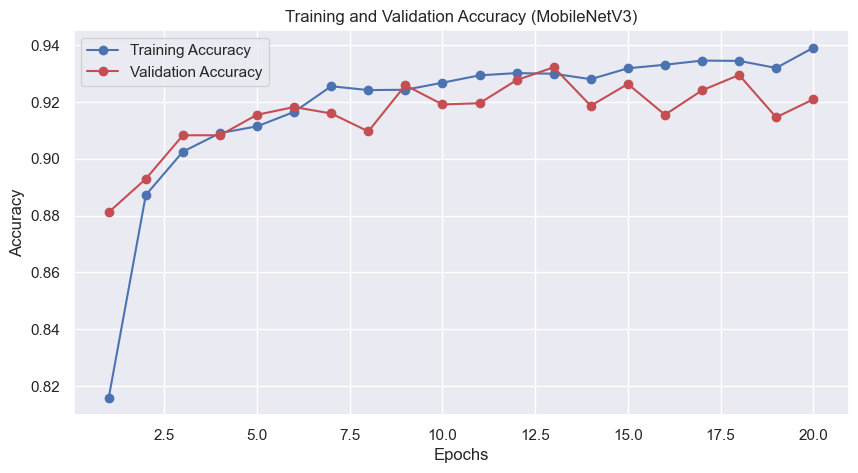

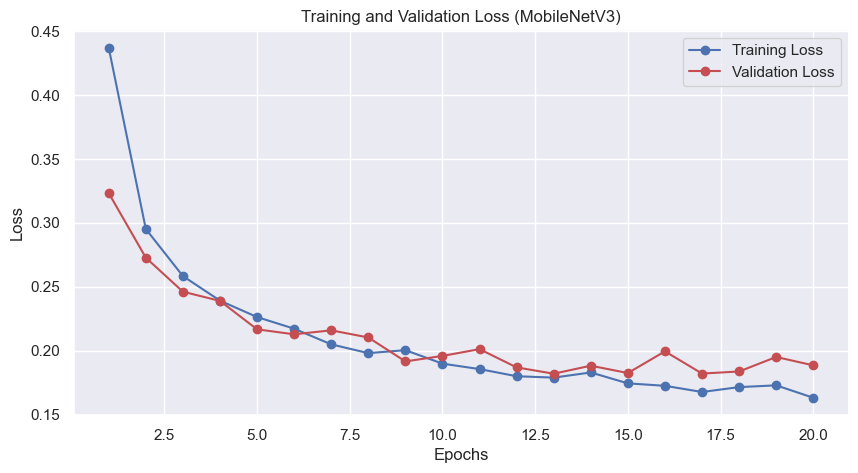

In [23]:
import matplotlib.pyplot as plt

# Extract data from history
acc = history_mobilenet_v3.history['accuracy']
val_acc = history_mobilenet_v3.history['val_accuracy']
loss = history_mobilenet_v3.history['loss']
val_loss = history_mobilenet_v3.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (MobileNetV3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss (MobileNetV3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
